In [1]:
!pip install fastai
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 52.9MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
pip freeze

absl-py==0.8.1
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.2.10
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.1.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.1.5
blis==0.4.1
bokeh==2.1.1
boto==2.49.0
boto3==1.14.48
botocore==1.17.48
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.2
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.4.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.1
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==7.4.0
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.3
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
debugpy==1.0.0rc2
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.2
distributed==1.25.3
Django==3

In [ ]:
from fastai.vision import *

from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np

Mounted at /content/gdrive


In [ ]:
base_dir = '/content/gdrive/My Drive/Digikala Contest/Color Recognition/'

In [ ]:
!unzip -q '/content/gdrive/My Drive/Digikala Contest/Color Recognition/Computer_Vision_Users.zip' -d '/content/gdrive/My Drive/Digikala Contest/Color Recognition'

replace /content/gdrive/My Drive/Digikala Contest/Color Recognition/test/117085879.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
train_imgs_path = base_dir + 'train'
test_imgs_path = base_dir + 'test'

In [ ]:
tfms = get_transforms(do_flip=True,flip_vert=True,max_lighting=0.2)

In [ ]:
data = (ImageList.from_folder(train_imgs_path) #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct(0.1)              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .add_test_folder(test_imgs_path)              #Optionally add a test set (here default name is test)
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch(bs=256))                   

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:262: UserWarning: There seems to be something wrong with your dataset, for example, in the first batch can't access these elements in self.train_ds: 1378,404,906,398,3046...
  warn(warn_msg)


In [ ]:
from fastai.metrics import Precision
precision = Precision()

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=[precision, accuracy],)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,precision,accuracy,time


KeyboardInterrupt: ignored

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


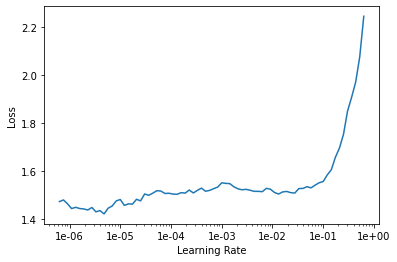

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,precision,accuracy,time
0,1.370567,1.130417,0.643707,0.656501,00:26


In [ ]:
learn.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,precision,accuracy,time
0,0.781260,1.027376,0.722424,0.718524,00:25
1,0.776201,0.942959,0.718180,0.722534,00:25
2,0.641564,0.898478,0.739894,0.740978,00:25
3,0.482630,0.890219,0.743947,0.740978,00:25


In [ ]:
learn.fit_one_cycle(1, 3e-4)

epoch,train_loss,valid_loss,precision,accuracy,time
0,0.889149,0.843488,0.715230,0.733547,00:28


In [ ]:
learn.fit_one_cycle(1, 3e-4)

epoch,train_loss,valid_loss,precision,accuracy,time
0,0.815391,0.775368,0.725189,0.749599,00:28


In [ ]:
learn.fit_one_cycle(1, 3e-4)

epoch,train_loss,valid_loss,precision,accuracy,time
0,0.748173,0.759364,0.738830,0.757624,00:27


In [ ]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,precision,accuracy,time
0,0.699164,0.733858,0.729998,0.752809,00:26


In [ ]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,precision,accuracy,time
0,0.665445,0.744480,0.735595,0.752809,00:26


In [ ]:
learn.fit_one_cycle(1, 3e-5)

epoch,train_loss,valid_loss,precision,accuracy,time
0,0.636623,0.729699,0.752850,0.770465,00:26


In [ ]:
preds,y = learn.get_preds(ds_type=DatasetType.Test,)

KeyboardInterrupt: ignored

In [ ]:
data.classes

['black',
 'blue',
 'brown',
 'green',
 'grey',
 'orange',
 'pink',
 'purple',
 'red',
 'silver',
 'white',
 'yellow']

In [ ]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

labels = np.argmax(preds, 1)
test_index = []
num = len(learn.data.test_ds)
for i in range(num):
    test_index.append(str(learn.data.test_ds.items[i]).split('/')[-1])

    
df = (pd.DataFrame(data={"Label": labels, "Filename": test_index}).sort_values(by='Filename'))

In [ ]:
df

,Label,Filename
527,2,1000000004.jpg
2170,7,1000000033.jpg
1757,11,1000000678.jpg
139,7,1000001233.jpg
200,3,1000001547.jpg
...,...,...
1783,5,121061980.jpg
2518,3,121072529.jpg
2155,4,121094344.jpg
1293,4,121138461.jpg


In [ ]:
color_to_id = {'pink':1,
'purple':2,
'yellow':3,
'orange':4,
'white':5,
'silver':6,
'grey':7,
'black':8,
'red':9,
'brown':10,
'green':11,
'blue':12}

In [ ]:
labels = []
for i in range(len(df)):
  labels.append(color_to_id.get(data.classes[df.iloc[i]['Label']]))

In [ ]:
df['Label'] = labels
df

,Label,Filename
527,10,1000000004.jpg
2170,2,1000000033.jpg
1757,3,1000000678.jpg
139,2,1000001233.jpg
200,11,1000001547.jpg
...,...,...
1783,4,121061980.jpg
2518,11,121072529.jpg
2155,7,121094344.jpg
1293,7,121138461.jpg


In [ ]:
df.to_csv(base_dir + '/predictions.csv', index= False)

In [ ]:
df.rename(columns={'Label': 'color_id', 'Filename': 'file_name'}, inplace=True)

In [ ]:
columns_titles = ["file_name","color_id"]
df=df.reindex(columns=columns_titles)

In [ ]:
df

,file_name,color_id
527,1000000004.jpg,10
2170,1000000033.jpg,2
1757,1000000678.jpg,3
139,1000001233.jpg,2
200,1000001547.jpg,11
...,...,...
1783,121061980.jpg,4
2518,121072529.jpg,11
2155,121094344.jpg,7
1293,121138461.jpg,7


In [ ]:
df.to_csv(base_dir + '/predictions.csv', index= False)